In [24]:
# 1. Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

%matplotlib inline


In [26]:
df = pd.read_csv('sleep_cycle_productivity.csv')
df.head()

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,2024-04-12,1860,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6
1,2024-11-04,1769,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7
2,2024-08-31,2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10
3,2024-02-22,8041,37,Other,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2
4,2024-02-23,4843,46,Other,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9


In [34]:
print(df.columns)

Index(['Date', 'Person_ID', 'Age', 'Gender', 'Sleep Start Time',
       'Sleep End Time', 'Total Sleep Hours', 'Sleep Quality',
       'Exercise (mins/day)', 'Caffeine Intake (mg)',
       'Screen Time Before Bed (mins)', 'Work Hours (hrs/day)',
       'Productivity Score', 'Mood Score', 'Stress Level'],
      dtype='object')


In [28]:
# Set visual style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

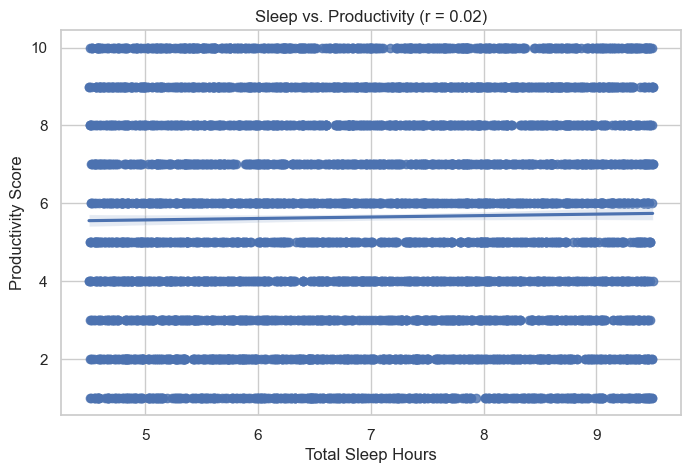

In [30]:
#Sleep vs. productivity
plt.figure()
sns.regplot(x="Total Sleep Hours", y="Productivity Score", data=df)
corr1, _ = pearsonr(df["Total Sleep Hours"], df["Productivity Score"])
plt.title(f"Sleep vs. Productivity (r = {corr1:.2f})")
plt.xlabel("Total Sleep Hours")
plt.ylabel("Productivity Score")
plt.show()

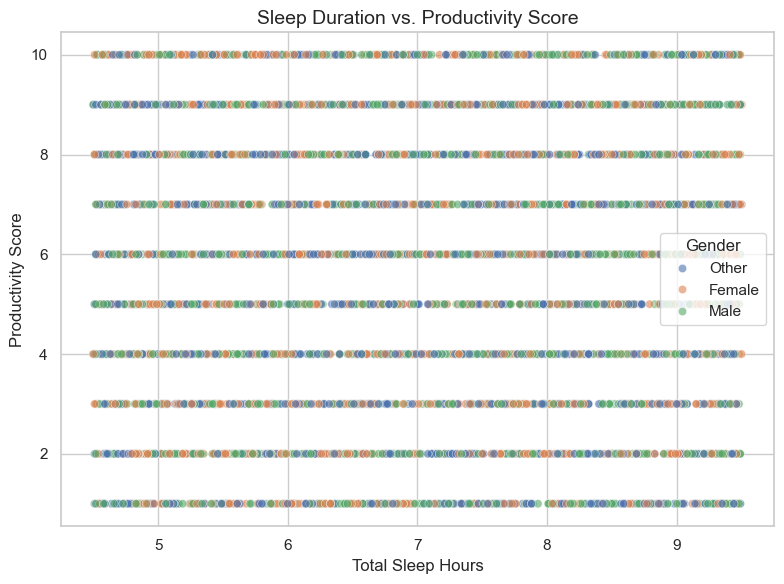

In [36]:
# Set the seaborn plot style
sns.set(style="whitegrid")

# Plot: Total Sleep Hours vs. Productivity Score
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="Total Sleep Hours",
    y="Productivity Score",
    hue="Gender",
    alpha=0.6
)

# Customize labels and title
plt.title("Sleep Duration vs. Productivity Score", fontsize=14)
plt.xlabel("Total Sleep Hours", fontsize=12)
plt.ylabel("Productivity Score", fontsize=12)
plt.legend(title="Gender")
plt.tight_layout()

# Display the plot
plt.show()

/var/folders/88/0cg5rjbd67n3y0_lvwhmg2yc0000gn/T/ipykernel_29966/1848656764.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


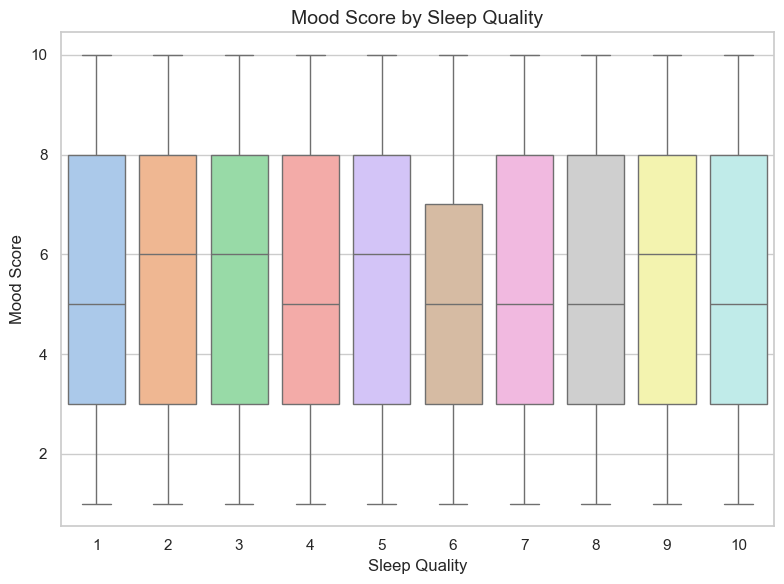

In [40]:
#sleep quality & mood 
plt.figure(figsize=(8, 6))
sns.boxplot(
    x="Sleep Quality",
    y="Mood Score",
    data=df,
    palette="pastel"  # You can change this to 'coolwarm', 'Set2', 'pastel', etc.
)


plt.title("Mood Score by Sleep Quality", fontsize=14)
plt.xlabel("Sleep Quality", fontsize=12)
plt.ylabel("Mood Score", fontsize=12)
plt.tight_layout()
plt.show()

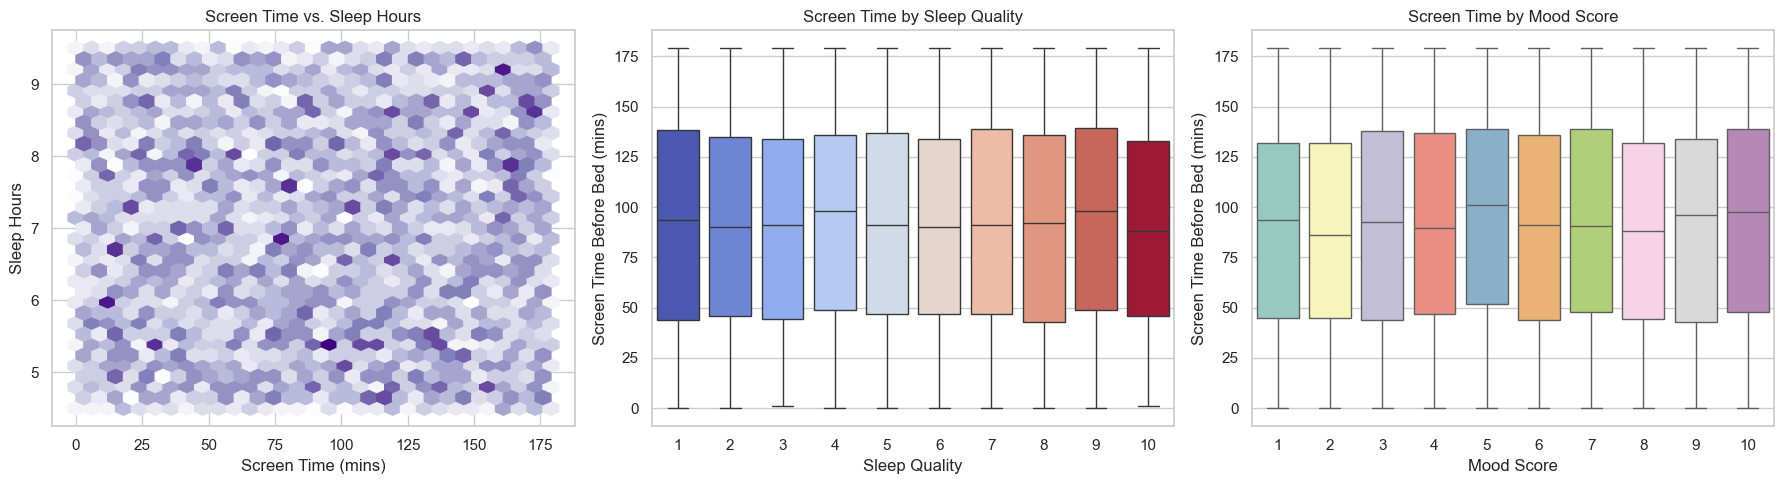

In [56]:
# Set up subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Hexbin for Screen Time vs. Sleep Hours
axs[0].hexbin(df["Screen Time Before Bed (mins)"], df["Total Sleep Hours"],
              gridsize=30, cmap='Purples')
axs[0].set_title("Screen Time vs. Sleep Hours")
axs[0].set_xlabel("Screen Time (mins)")
axs[0].set_ylabel("Sleep Hours")

# Plot 2: Boxplot for Sleep Quality
sns.boxplot(ax=axs[1],
            x="Sleep Quality",
            y="Screen Time Before Bed (mins)",
            hue="Sleep Quality",  # Assign hue same as x
            data=df,
            palette="coolwarm",
            legend=False)         # Hide redundant legend
axs[1].set_title("Screen Time by Sleep Quality")

# Plot 3: Boxplot for Mood Score
sns.boxplot(ax=axs[2],
            x="Mood Score",
            y="Screen Time Before Bed (mins)",
            hue="Mood Score",     # Assign hue same as x
            data=df,
            palette="Set3",
            legend=False)         # Hide redundant legend
axs[2].set_title("Screen Time by Mood Score")

plt.tight_layout()
plt.show()

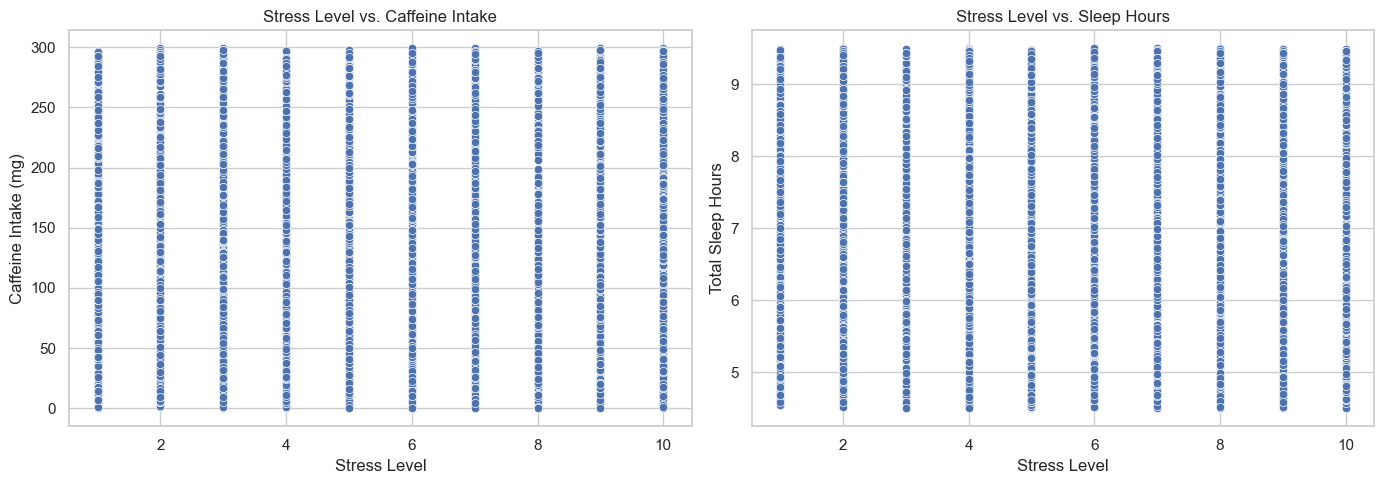

In [14]:
#stress Level vs. Sleep & Caffeine

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
sns.scatterplot(x="Stress Level", y="Caffeine Intake (mg)", data=df, ax=axs[0])
axs[0].set_title("Stress Level vs. Caffeine Intake")

sns.scatterplot(x="Stress Level", y="Total Sleep Hours", data=df, ax=axs[1])
axs[1].set_title("Stress Level vs. Sleep Hours")

plt.tight_layout()
plt.show()

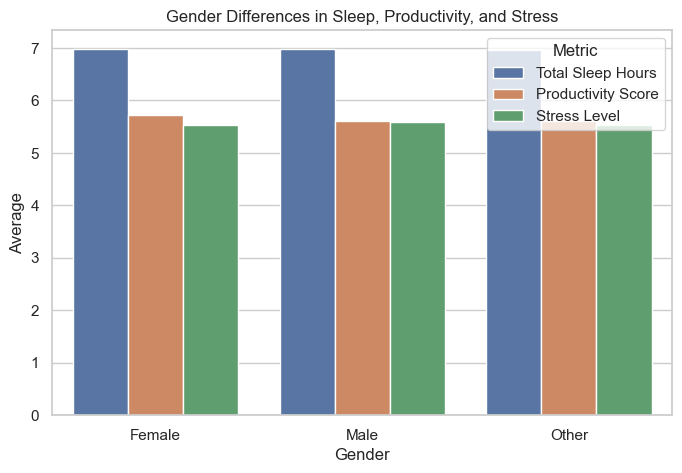

In [16]:
gender_means = df.groupby("Gender")[["Total Sleep Hours", "Productivity Score", "Stress Level"]].mean().reset_index()
gender_means_melted = gender_means.melt(id_vars="Gender", var_name="Metric", value_name="Average")

plt.figure()
sns.barplot(x="Gender", y="Average", hue="Metric", data=gender_means_melted)
plt.title("Gender Differences in Sleep, Productivity, and Stress")
plt.ylabel("Average")
plt.show()

Correlation between Work Hours and Productivity Score: -0.02


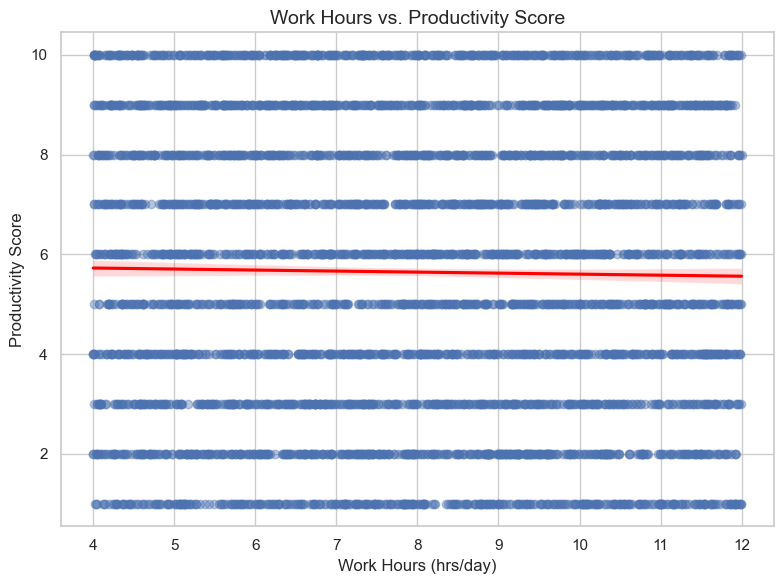

In [62]:
#Work Hours vs. Productivity Score (Scatter + Trendline)

# Optional: Clean column names
df.columns = df.columns.str.strip()

# Plot: Work Hours vs. Productivity Score with regression line
plt.figure(figsize=(8, 6))
sns.regplot(
    data=df,
    x="Work Hours (hrs/day)",
    y="Productivity Score",
    scatter_kws={'alpha': 0.4},  # transparent dots
    line_kws={'color': 'red'},   # regression line
)

# Customize plot
plt.title("Work Hours vs. Productivity Score", fontsize=14)
plt.xlabel("Work Hours (hrs/day)", fontsize=12)
plt.ylabel("Productivity Score", fontsize=12)
plt.tight_layout()

correlation = df["Work Hours (hrs/day)"].corr(df["Productivity Score"])
print(f"Correlation between Work Hours and Productivity Score: {correlation:.2f}")

# Show the plot
plt.show()